                                                LAB ASSIGNMENTS
                                        Module 2: Machine Learning


Naïve Bayes

Perform naïve bayes Algorithm on Default.csv dataset
By doing train test split calculate roc_curve. And plot roc_auc_score

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv(r'D:\1_AJINKYA_PAWAR\3_SOFTWARE JOB\1_CDAC\3_AI_Course\Lab_Assignment_Module_2\2_4_7_NaiveBayes_1Hr\Default.csv')
data

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


In [2]:
# Encoding the 'default' column to binary values (1 for 'Yes', 0 for 'No')
data['default'] = data['default'].map({'Yes': 1, 'No': 0})


# One-hot encoding the 'student' column
data = pd.get_dummies(data, columns=['student'], drop_first=True)

# Splitting the data into features (X) and the target variable (y)
X = data.drop('default', axis=1)
y = data['default']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
clf = GaussianNB()
clf.fit(X_train, y_train)


GaussianNB()

In [5]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]


In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


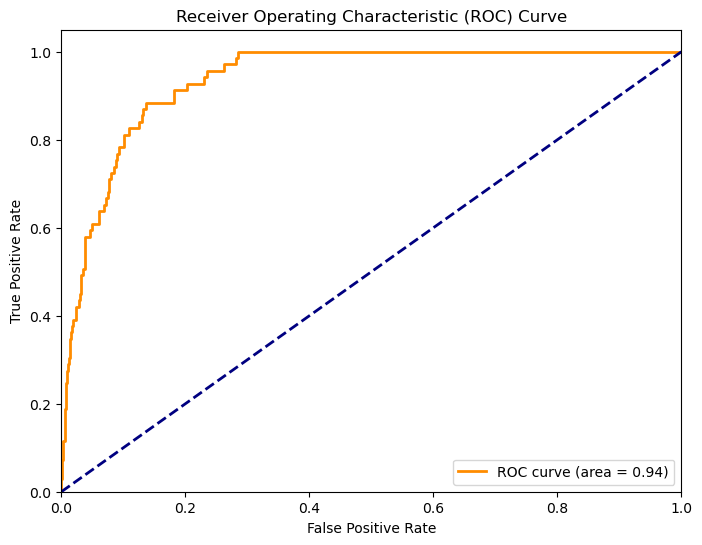

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
